In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:


def jacobi(A,b,N=25,x=None):
    if x is None:
        x = np.zeros(len(A[0]))

                                                                                                                                                                    
    D = np.diag(A)
    R = A - np.diagflat(D)

                                                                                                                                                                             
    for i in range(N):
        x = (b - np.dot(R,x)) / D
    return x

A = np.array([[2.0,1.0],[5.0,7.0]])
b = np.array([11.0,13.0])
guess = np.array([1.0,1.0])

sol = jacobi(A,b,N=25,x=guess)

print("A:",A)
print("b:",b)
print("x:",sol)


A: [[2. 1.]
 [5. 7.]]
b: [11. 13.]
x: [ 7.11110202 -3.22220342]


In [4]:

A = np.array([[3.0,-1.0,1.0],[3.0,6.0,2.0],[3.0,3.0,7.0] ])
b = np.array([1.0,0.0,4.0])
guess = np.array([0.0,0.0,0.0])

sol = jacobi(A,b,N=25,x=guess)
print("x:",sol)


x: [ 0.03508772 -0.23684211  0.65789474]


In [8]:
import numpy as np

def gaussSeidel(iterEqs,x,tol = 1.0e-9):
    omega = 1.0
    k = 10
    p = 1
    for i in range(1,501):
        xOld = x.copy()
        x = iterEqs(x,omega)
        dx = np.sqrt(np.dot(x-xOld,x-xOld)) 
        if dx < tol:
            return x,i,omega
        if i == k:
            dx1 = dx
        if i == k + p:
            dx2 = dx
            omega = 2.0/(1.0 + np.sqrt(1.0 - (dx2/dx1)**(1.0/p))) 
print("Gauss-Seidel failed to converge")


Gauss-Seidel failed to converge


In [23]:
import numpy as np 
import math 

A = np.array([[3.0, 1.0, 0., 0., 0., 0., 0., 0., 0., 0.],
              [1.0, 3.0, 1.0, 0., 0., 0., 0., 0., 0., 0.], 
              [0., 1.0, 3.0, 1.0, 0., 0., 0., 0., 0., 0.], 
              [0., 0, 1.0, 3.0, 1.0, 0., 0., 0., 0., 0.], 
              [0., 0., 0., 1.0, 3.0, 1.0, 0., 0., 0., 0.], 
              [0., 0., 0., 0., 1.0, 3.0, 1.0, 0., 0., 0.], 
              [0., 0., 0., 0., 0., 1.0, 3.0, 1.0, 0., 0.], 
              [0., 0., 0., 0., 0., 0., 1.0, 3.0, 1.0, 0.], 
              [0., 0., 0., 0., 0., 0., 0., 1.0, 3.0, 1.0], 
              [0., 0., 0., 0., 0., 0., 0., 0., 1.0, 3.0]])

b = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
x0 = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tol =  10 ** (-15)
max_iter = 20
w = 1.5

def SOR(A, b, x0, tol, max_iter, w): 
    if (w<=1 or w>2): 
        print('w should be inside [1, 2)'); 
        step = -1; 
        x = float('nan') 
        return 
    n = b.shape 
    x = x0 

    for step in range (1, max_iter): 
        for i in range(n[0]): 
            new_values_sum = np.dot(A[i, :i], x[:i])
            old_values_sum = np.dot(A[i, i+1 :], x0[ i+1: ]) 
            x[i] = (b[i] - (old_values_sum + new_values_sum)) / A[i, i] 
            x[i] = np.dot(x[i], w) + np.dot(x0[i], (1 - w))  
      
        if (np.linalg.norm(np.dot(A, x)-b ) < tol):
            print(step) 
            break 
        x0 = x

    print("X = {}".format(x)) 
    print("The number of iterations is: {}".format(step))
    return x
x = SOR(A, b, x0, tol, max_iter, w)
print(np.dot(A, x))

X = [0.27638192 0.17085425 0.21105529 0.19597989 0.20100503 0.20100502
 0.1959799  0.21105527 0.17085427 0.27638191]
The number of iterations is: 19
[1.00000002 0.99999998 1.00000002 0.99999999 1.00000001 1.
 1.         1.         1.         1.        ]


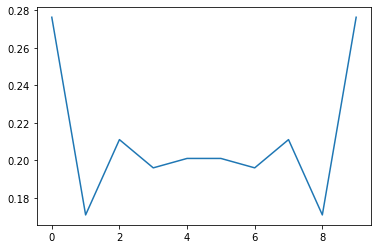

In [18]:
plt.plot(x[0:10])

In [50]:
import numpy as np

def sor_solver(A, b, omega, guess,tolerance):
    phi = guess
    residual = np.linalg.norm(A@phi - b)
    while residual > tolerance:
        for i in range(A.shape[0]):     # columns
            sigma = 0
            for j in range(A.shape[1]): # columns 
                if j != i:
                    sigma += A[i][j] * phi[j]
            phi[i] = (1 - omega) * phi[i] + (omega / A[i][i]) * (b[i] - sigma)
        residual =  np.linalg.norm(A@phi - b)
        print('Residual: {0:10.6g}'.format(residual))
    return phi


tol = 1e-8
omega = 0.5

A = np.array([[ 4, -1, -6,  0],
              [-5, -4, 10,  8],
              [ 0,  9,  4, -2],
              [ 1,  0, -7,  5]])

b = np.array([2, 21, -12, -6])

guess = np.zeros(4)

phi = sor_solver(A, b, omega, guess, tol)
print(phi)


Residual:    14.6179
Residual:    11.2948
Residual:    3.67768
Residual:    3.19424
Residual:    2.53585
Residual:    0.68396
Residual:    0.75634
Residual:   0.593797
Residual:   0.189146
Residual:   0.190827
Residual:   0.144984
Residual:  0.0584829
Residual:  0.0500644
Residual:  0.0366401
Residual:  0.0175857
Residual:  0.0134192
Residual: 0.00950158
Residual:  0.0051081
Residual: 0.00363697
Residual: 0.00250919
Residual: 0.00144923
Residual: 0.000991173
Residual: 0.000670862
Residual: 0.000405216
Residual: 0.000270828
Residual: 0.000180835
Residual: 0.000112307
Residual: 7.40858e-05
Residual: 4.90057e-05
Residual: 3.09616e-05
Residual: 2.0275e-05
Residual: 1.3326e-05
Residual: 8.50875e-06
Residual: 5.54917e-06
Residual: 3.63169e-06
Residual: 2.33393e-06
Residual: 1.51871e-06
Residual: 9.91113e-07
Residual: 6.39471e-07
Residual: 4.1561e-07
Residual: 2.7072e-07
Residual: 1.75092e-07
Residual: 1.13725e-07
Residual: 7.39876e-08
Residual: 4.79227e-08
Residual: 3.11164e-08
Residual: 2.0

In [44]:

A = np.array([[3.0, 1.0, 0., 0., 0., 0., 0., 0., 0., 0.],
              [1.0, 3.0, 1.0, 0., 0., 0., 0., 0., 0., 0.], 
              [0., 1.0, 3.0, 1.0, 0., 0., 0., 0., 0., 0.], 
              [0., 0, 1.0, 3.0, 1.0, 0., 0., 0., 0., 0.], 
              [0., 0., 0., 1.0, 3.0, 1.0, 0., 0., 0., 0.], 
              [0., 0., 0., 0., 1.0, 3.0, 1.0, 0., 0., 0.], 
              [0., 0., 0., 0., 0., 1.0, 3.0, 1.0, 0., 0.], 
              [0., 0., 0., 0., 0., 0., 1.0, 3.0, 1.0, 0.], 
              [0., 0., 0., 0., 0., 0., 0., 1.0, 3.0, 1.0], 
              [0., 0., 0., 0., 0., 0., 0., 0., 1.0, 3.0]])

b = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
x0 = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tol =  10 ** (-15)
max_iter = 20
w = 1
phi = sor_solver(A, b, w, x0, tol)
print(phi)

Residual:   0.743607
Residual:   0.177597
Residual:  0.0428441
Residual:  0.0114389
Residual: 0.00360773
Residual: 0.00141569
Residual: 0.000619415
Residual: 0.000285533
Residual: 0.000133957
Residual: 6.36727e-05
Residual: 3.02444e-05
Residual: 1.40799e-05
Residual: 6.38572e-06
Residual: 2.82822e-06
Residual: 1.22892e-06
Residual: 5.26217e-07
Residual: 2.2284e-07
Residual: 9.35848e-08
Residual: 3.90567e-08
Residual: 1.62231e-08
Residual: 6.71458e-09
Residual: 2.77158e-09
Residual: 1.14167e-09
Residual: 4.69539e-10
Residual: 1.92878e-10
Residual: 7.91576e-11
Residual: 3.24639e-11
Residual: 1.33068e-11
Residual: 5.45221e-12
Residual: 2.23332e-12
Residual: 9.14441e-13
Residual: 3.74252e-13
Residual: 1.53208e-13
Residual: 6.27012e-14
Residual: 2.56961e-14
Residual: 1.05149e-14
Residual: 4.23634e-15
Residual: 1.69831e-15
Residual: 7.1089e-16
[0.27638191 0.17085427 0.21105528 0.1959799  0.20100503 0.20100503
 0.1959799  0.21105528 0.17085427 0.27638191]


In [53]:
def jacobi(A, b, x_init, epsilon=1e-10, max_iterations=500):
    D = np.diag(np.diag(A))
    LU = A - D
    x = x_init
    for i in range(max_iterations):
        D_inv = np.diag(1 / np.diag(D))
        x_new = np.dot(D_inv, b - np.dot(LU, x))
        if np.linalg.norm(x_new - x) < epsilon:
            return x_new
        x = x_new
    return x

# problem data
A = np.array([
    [5, 2, 1, 1],
    [2, 6, 2, 1],
    [1, 2, 7, 1],
    [1, 1, 2, 8]
])
b = np.array([29, 31, 26, 19])

# you can choose any starting vector
x_init = np.zeros(len(b))
x = jacobi(A, b, x_init)

print("x:", x)
print("computed b:", np.dot(A, x))
print("real b:", b)

x: [3.99275362 2.95410628 2.16183575 0.96618357]
computed b: [29. 31. 26. 19.]
real b: [29 31 26 19]
